## 1. Loading Data

Netflix, which began as a DVD rental service in 1997, has grown into the world's largest media and entertainment company by market capitalization, with over 200 million subscribers as of January 2021.


Given the extensive library of films and series on the platform, it presents an excellent chance to hone our data manipulation skills and delve into the entertainment sector. Our friend has been polishing their Python abilities and has begun analyzing a CSV file filled with Netflix data. They have started their analysis and suspect that the average movie length is decreasing.


As proof, they've given us the average movie durations from 2011 to 2020, which are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90 minutes, respectively.


If we're going to examine this data, it would be smart to start working with pandas. However, before we can do that, we need to create a DataFrame from scratch. We'll begin by crafting a Python object that we've learned about in Intermediate Python: a dictionary!

In [25]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"years" : years, "durations" : durations}

# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

## 2. Creating a DataFrame from a dictionary

In order to transform our dictionary, movie_dict, into a pandas DataFrame, we first need to import the necessary library using its common alias. It's also important to examine our DataFrame to confirm it was constructed properly. Let's carry out these steps immediately.

In [26]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df.head()

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100


## 3. A visual representation of our data

Okay, we've successfully created a pandas DataFrame, which is the most frequently used method to handle tabular data in Python. Now, let's return to our main objective. We aim to investigate our friend's claim that the durations of movies are decreasing over time. A good starting point would be to visualize this data.


Considering that the data is continuous, a line plot seems to be an appropriate choice, with the dates displayed on the x-axis and the average duration in minutes on the y-axis. This will enable us to easily identify any trends in movie lengths. Python offers several ways to visualize data, but matplotlib.pyplot is one of the most widely used packages for this purpose.


Note: To ensure your plot is tested correctly, you'll need to initialize a matplotlib.pyplot Figure object, which we have already provided in the cell below. You can proceed to create your plot.

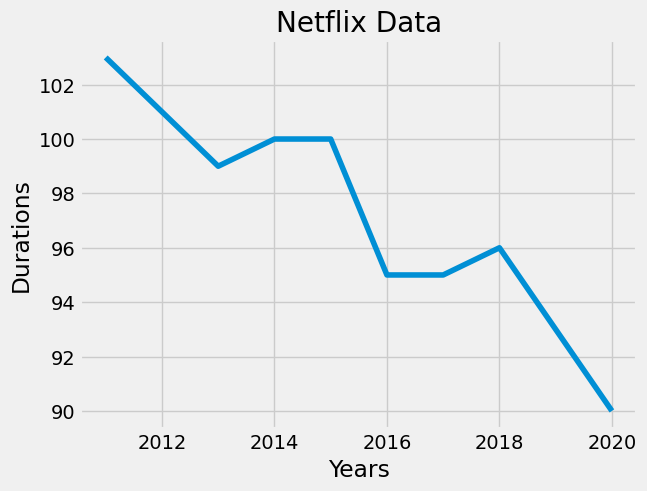

In [27]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years, durations)

# Create a title
plt.xlabel("Years")
plt.ylabel("Durations")
plt.title("Netflix Data")

# Show the plot
plt.show()

## 4. Loading the data from a CSV

It seems that there's some truth to the notion that movie durations have been decreasing over the last decade! However, with only our friend's summary data, we're restricted in the additional analysis we can conduct. There are several questions about this trend that we can't answer at the moment, including:


How does this trend appear over a more extended time frame?
Could this be explained by factors such as the genre of entertainment?


When we request the original CSV file our friend used for their analyses, they happily provide it. We now have the CSV file, found at "netflix_data.csv". Let's construct another DataFrame, this time encompassing all the data. Considering the size of our friend's data, printing the entire DataFrame may not be practical, so we'll examine it by printing just the first five rows.


In [28]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("data/netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


## 5. Filtering the data

Great, we've got our data! Now we can start analyzing movie durations.


However, upon reviewing the first five rows of our new DataFrame, we notice a column labeled 'type'. A quick scan reveals that the dataset also includes TV shows! Additionally, the 'duration' column that we intended to use appears to represent different units depending on whether the row corresponds to a movie or a show (maybe minutes versus seasons?).


Thankfully, a DataFrame enables us to filter data efficiently. We can choose rows where the 'type' is 'Movie'. While doing this, let's also remember that we don't require information from all columns, so we'll create a new DataFrame named 'netflix_movies' that contains only 'title', 'country', 'genre', 'release_year', and 'duration'.


Time to apply our data subsetting skills!

In [29]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df.loc[netflix_df["type"] == "Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only.loc[:, ["title", "country", "genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## 6. Creating a scatter plot

Great progress so far! We've imported the raw data, selected rows for movies, and trimmed our DataFrame to include only the columns we're interested in. Let's attempt to visualize the data again to observe trends over a more extended period.


This time around, we're dealing with individual movies instead of aggregate data. A line plot won't be suitable for our current data set, so let's opt for a scatter plot instead. We'll continue with the year of release on the x-axis and movie duration on the y-axis.


Note: Although it's not covered yet in the lesson, we've included the code fig = plt.figure(figsize=(12,8)) to enlarge the plot for better visibility and to aid with testing. For more information on how to create or work with a matplotlib figure, consult the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html).

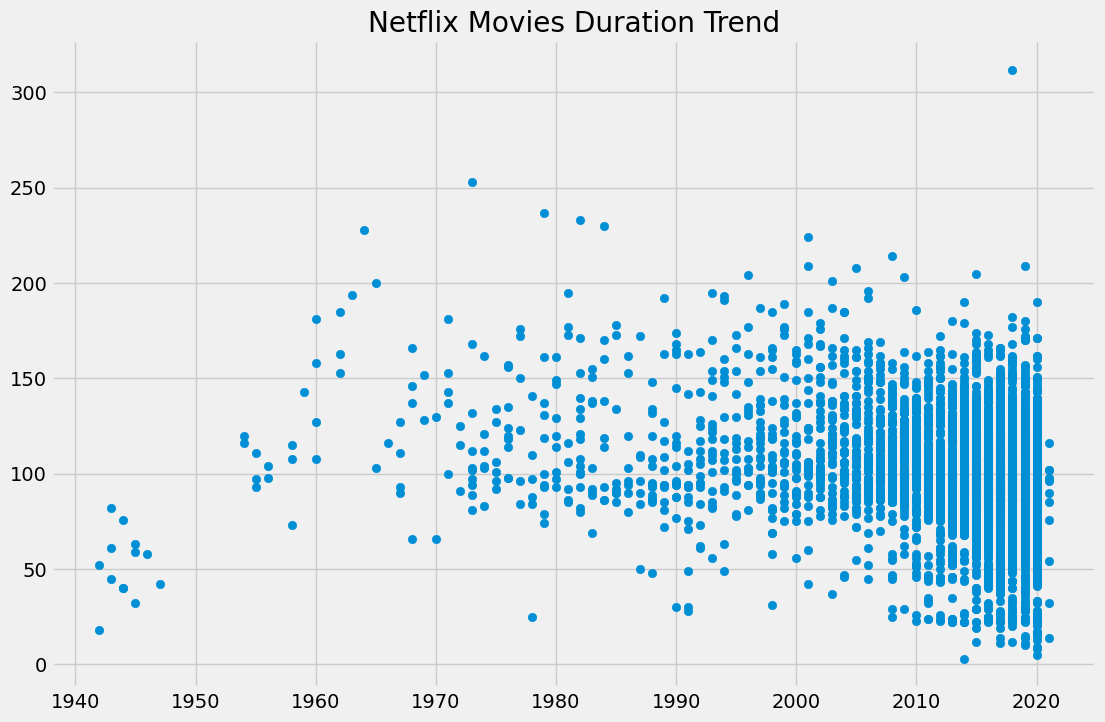

In [30]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

# Create a title
plt.title("Netflix Movies Duration Trend")

# Show the plot
plt.show()

## 7. Dive Deeper

This visualization is already more insightful than the initial plot we created with the preliminary data from our friend. It's evident that while newer movies are more prevalent on the platform, a considerable number of short movies have been released in the last twenty years.


However, upon closer examination, we notice another trend. Some of these films are less than an hour long! Let's filter our DataFrame to include only movies with a duration shorter than 60 minutes and examine their genres. This could potentially provide us with insights into what's lowering the average duration.

In [31]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset.loc[netflix_movies_col_subset["duration"] < 60]

# Print the first 20 rows of short_movies
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


## 8. Marking non-feature films

That's fascinating! It appears that many of the films shorter than 60 minutes belong to genres such as "Children", "Stand-Up", and "Documentaries". This makes sense, as these types of films are typically shorter than a 90-minute Hollywood blockbuster.


One approach could be to remove these rows from our DataFrame and replot the data. However, another interesting way to explore the impact of these genres on our data would be to include them in the plot but mark them with a different color.


There are numerous ways to accomplish this in Python, but one enjoyable method might be to use a loop to generate a list of colors based on the 'genre' column. Just like we did in Intermediate Python, we can then pass this list to our plotting function in a later step to color all non-typical genres differently!


Note: While we're using basic colors like red, blue, green, and black, matplotlib supports many named colors that you can use when creating plots. For more information, you can refer to the documentation [here](https://matplotlib.org/stable/gallery/color/named_colors.html)

In [32]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if row["genre"] == "Childern" :
        colors.append("red")
    elif row["genre"] == "Stand-Up" :
        colors.append("blue")
    elif row["genre"] == "Documentaries" :
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'green']

In [33]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if row['genre'] == "Documentaries":
        colors.append("red")
    elif row['genre'] == "Children":
        colors.append("blue")
    elif row['genre'] == "Stand-Up":
        colors.append ("green")
    else:
        colors.append("grey")
        
# Inspect the first 10 values in your list        
colors[:10]

['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'red']

## 9. Plotting with color

Great use of loops! We now have a 'colors' list that we can feed into our scatter plot. This should enable us to visually assess whether these genres could be behind the decrease in average movie duration.


This time, let's also enhance our plot with additional axis labels and a fresh theme using plt.style.use(). The latter isn't covered in Intermediate Python, but it's a fun way to add some visual appeal to a basic matplotlib plot. You can find more information on customizing your plot's style [here](https://matplotlib.org/stable/users/explain/customizing.html)

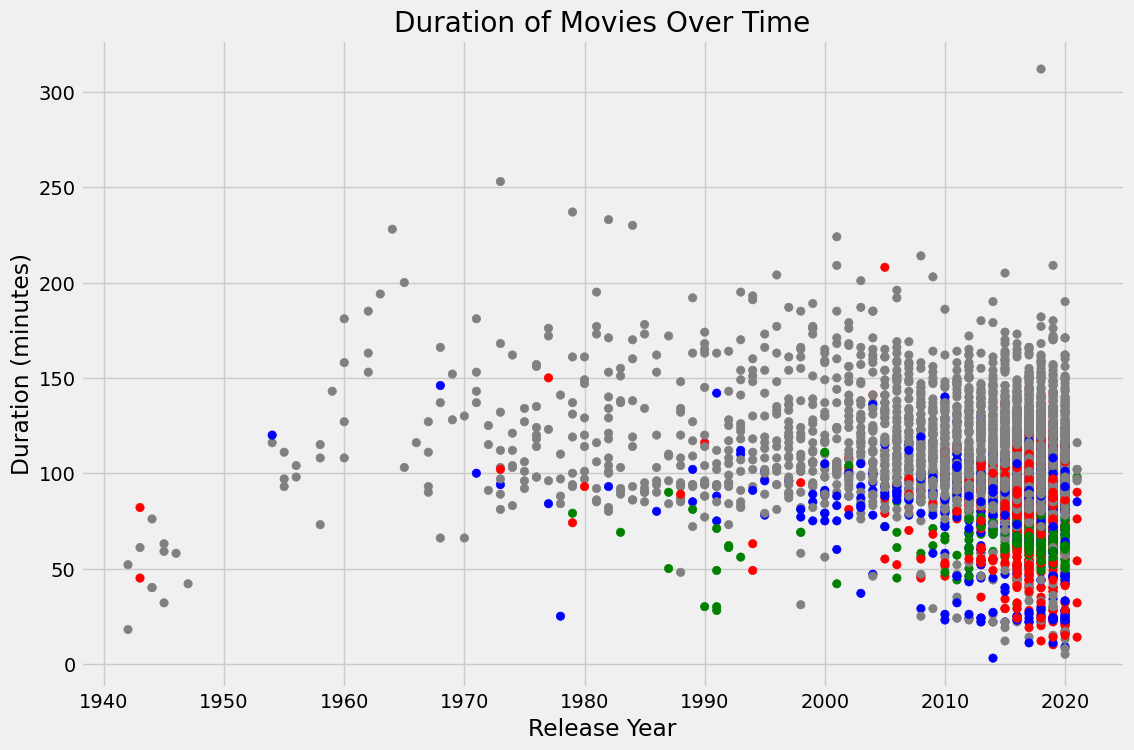

In [34]:
# Set the figure style and initialize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"],
           netflix_movies_col_subset["duration"],
           c=colors)

# Create a title and axis labels
plt.title("Duration of Movies Over Time")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.grid(True)

# Show the plot
plt.show()

## 10. What next?

Indeed, as we hypothesized, non-typical genres like children's movies and documentaries are clustered towards the lower half of the plot. However, we can't draw definitive conclusions until we conduct further analysis.


Congratulations! You've successfully performed an exploratory analysis of some entertainment data, and there are numerous exciting ways to enhance your skills as a Python data scientist. These include learning how to delve deeper into data with statistics, creating more complex visualizations, and perhaps most crucially, mastering more advanced techniques for working with data in pandas.